<a href="https://colab.research.google.com/github/cdtalley/Data-Science-Portfolio/blob/main/Corporate_Bankruptcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corporate Bankruptcy Prediction

Bankruptcy is a legal process through which people or corporate entities who cannot repay debts to creditors may seek relief from some or all of their debts. Bankruptcy is often initiated by the debtor, making the use of predictive modeling a major tool in the finance industry to save costs associated with bankruptcy. Early detections allow creditors to analyze their own risk and help mitigate unwanted transactions beforehand. 

The detection of bankruptcy benefits creditors, investors, shareholders, partners, and even buyers and suppliers as a measure of financial health, as well as impacting many facets of the financial market, making bankruptcy prediction a longstanding issue within finance, accounting, and management science. The coronavirus pandemic has placed increased stress on financial markets and businesses alike due to many different economic factors, furthering the importance of development of machine learning models in predicting financial indicators such as bankruptcy.

I will explore and compare the performance of new and legacy machine learning models with a history of use in the financial industry.

The data was collected from the Taiwan Economic Journal from the years 1999 to 2009. Company bankruptcy was defined based on the definition given by business regulations of the Taiwan Stock Exchange.



## Feature Information
(Y = Output/Target Feature, X = Input Features)

* Y - Bankruptcy indicator: Class label; 1 for presence of bankruptcy, 0 for no bankruptcy.
* X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
* X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
* X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
* X4 - Operating Gross Margin: Gross Profit/Net Sales
* X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
* X6 - Operating Profit Rate: Operating Income/Net Sales
* X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
* X8 - After-tax net Interest Rate: Net Income/Net Sales
* X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
* X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
* X11 - Operating Expense Rate: Operating Expenses/Net Sales
* X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
* X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
* X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* X15 - Tax rate (A): Effective Tax Rate
* X16 - Net Value Per Share (B): Book Value Per Share(B)
* X17 - Net Value Per Share (A): Book Value Per Share(A)
* X18 - Net Value Per Share (C): Book Value Per Share(C)
* X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
* X20 - Cash Flow Per Share
* X21 - Revenue Per Share (Yuan ¥): Sales Per Share
* X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
* X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
* X24 - Realized Sales Gross Profit Growth Rate
* X25 - Operating Profit Growth Rate: Operating Income Growth
* X26 - After-tax Net Profit Growth Rate: Net Income Growth
* X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
* X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* X29 - Total Asset Growth Rate: Total Asset Growth
* X30 - Net Value Growth Rate: Total Equity Growth
* X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* X32 - Cash Reinvestment %: Cash Reinvestment Ratio
* X33 - Current Ratio
* X34 - Quick Ratio: Acid Test
* X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
* X36 - Total debt/Total net worth: Total Liability/Equity Ratio
* X37 - Debt ratio %: Liability/Total Assets
* X38 - Net worth/Assets: Equity/Total Assets
* X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* X40 - Borrowing dependency: Cost of Interest-bearing Debt
* X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
* X42 - Operating profit/Paid-in capital: Operating Income/Capital
* X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
* X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
* X45 - Total Asset Turnover
* X46 - Accounts Receivable Turnover
* X47 - Average Collection Days: Days Receivable Outstanding
* X48 - Inventory Turnover Rate (times)
* X49 - Fixed Assets Turnover Frequency
* X50 - Net Worth Turnover Rate (times): Equity Turnover
* X51 - Revenue per person: Sales Per Employee
* X52 - Operating profit per person: Operation Income Per Employee
* X53 - Allocation rate per person: Fixed Assets Per Employee
* X54 - Working Capital to Total Assets
* X55 - Quick Assets/Total Assets
* X56 - Current Assets/Total Assets
* X57 - Cash/Total Assets
* X58 - Quick Assets/Current Liability
* X59 - Cash/Current Liability
* X60 - Current Liability to Assets
* X61 - Operating Funds to Liability
* X62 - Inventory/Working Capital
* X63 - Inventory/Current Liability
* X64 - Current Liabilities/Liability
* X65 - Working Capital/Equity
* X66 - Current Liabilities/Equity
* X67 - Long-term Liability to Current Assets
* X68 - Retained Earnings to Total Assets
* X69 - Total income/Total expense
* X70 - Total expense/Assets
* X71 - Current Asset Turnover Rate: Current Assets to Sales
* X72 - Quick Asset Turnover Rate: Quick Assets to Sales
* X73 - Working capitcal Turnover Rate: Working Capital to Sales
* X74 - Cash Turnover Rate: Cash to Sales
* X75 - Cash Flow to Sales
* X76 - Fixed Assets to Assets
* X77 - Current Liability to Liability
* X78 - Current Liability to Equity
* X79 - Equity to Long-term Liability
* X80 - Cash Flow to Total Assets
* X81 - Cash Flow to Liability
* X82 - CFO to Assets
* X83 - Cash Flow to Equity
* X84 - Current Liability to Current Assets
* X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
* X86 - Net Income to Total Assets
* X87 - Total assets to GNP price
* X88 - No-credit Interval
* X89 - Gross Profit to Sales
* X90 - Net Income to Stockholder's Equity
* X91 - Liability to Equity
* X92 - Degree of Financial Leverage (DFL)
* X93 - Interest Coverage Ratio (Interest expense to EBIT)
* X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
* X95 - Equity to Liability

In [ ]:
# Import necessary packages.
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import io
from matplotlib import pyplot as plt
from scipy import stats
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import warnings

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Mounting Google drive.
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [ ]:
# Dataset is now stored in a Pandas Dataframe by using Pandas read_csv input function.
df = pd.read_csv("/content/drive/My Drive/Data/Company Bankruptcy Prediction/data.csv")

# Exploratory Data Analysis

First, we will perform Exploratory Data Analysis by running descriptive statistics, and visualizing our data. This allows us to understand our data before we feed it into our machine learning model, and examine it closely for any outliers or potential problems such as missing values that may effect predictive accuracy. Exploratory Data Analysis is a crucial component to developing any data science project, and is considered an iterative process.

In [ ]:
# Setting max columns to show all columns in the newly created Pandas DataFrame.
pd.set_option("max_columns", None)

# Calling Pandas head function to take a look at the first 5 rows of our newly created DataFrame.
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [ ]:
# Reset option to display all columns.
pd.reset_option('max_columns')

Taking a quick look at our DataFrame above we can see that the first column contains our target variable of bankruptcy. The rest of our data is numerical in nature and contains indicator variables for financial instruments such as the 'Net Income Flag' column, in addition to various financial metrics. Most of these entries have been normalized, or display a percentage, with some non-normalized entries that should be closely looked at for any outliers that may affect predictive modeling.

In [ ]:
# Let's confirm that all of our features are the correct data type by calling Pandas info function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

All features are stored in their respective data type, with 93 columns displaying the float data type, and 3 displaying integer data types. The integer data types are representing indicator variables, such as our target variable bankruptcy, with either the presence of 0 or 1. We have 6819 entries in our dataset overall, or 6861 rows.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


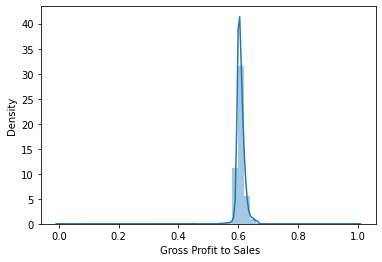

In [ ]:
# Generating a histplot with seaborn to visualize the distribution of Gross Profit to Sales.
sns.distplot(df[' Gross Profit to Sales'])

We can see that the majority of entries are floating around the 0.6 mark, or 60% gross profit to sales. Gross Profit to Sales ratio understandably may be an important feature for use in the building of our predictive model. Let's examine the distributions of some other features, notably those related to our target variable, by first building a heatmap of all features and selecting those displaying a higher correlation value to our target. 

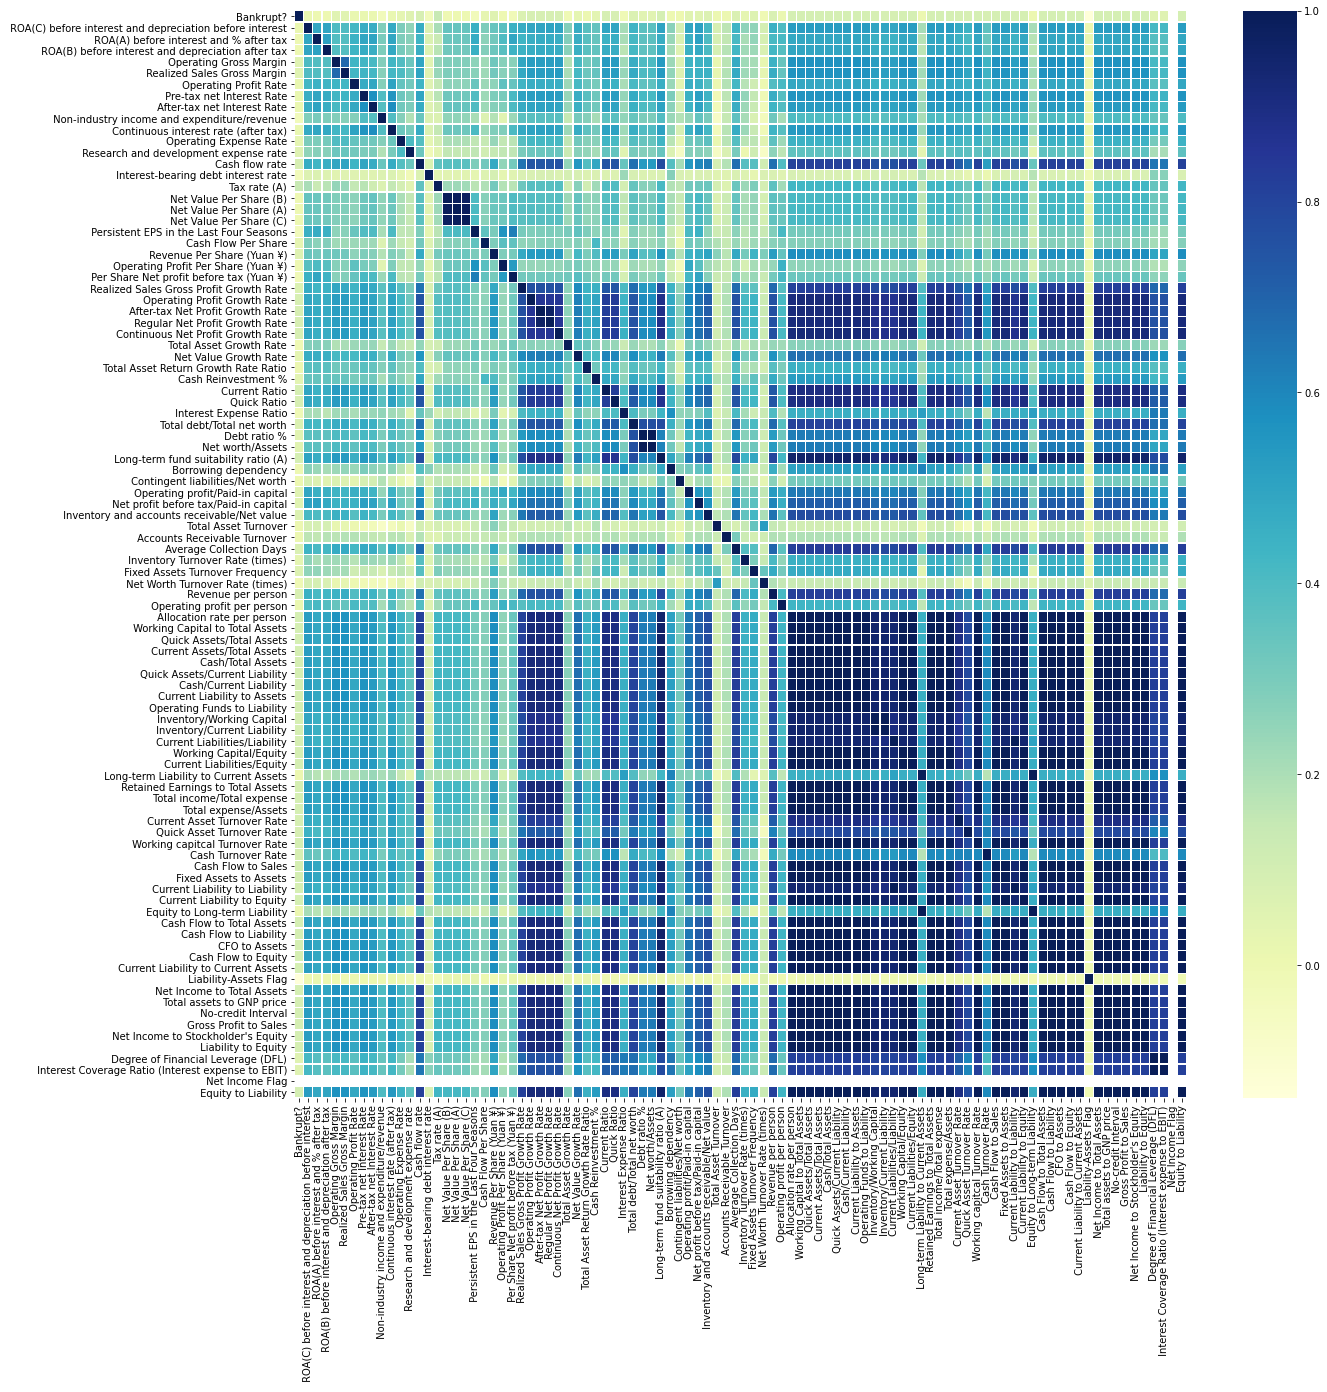

In [ ]:
# Plotting a correlation heatmap to give us a visual representation of our correlation matrix. 
plt.figure(figsize=(20, 20))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

Looking at the above heatmap we see some input features of interest such as the feature 'Tax Rate (A)' which is displaying a higher correlation value on the correlation matrix than most of the other features with a darker shading. Let's visualize the distribution of this feature next to learn more about it.

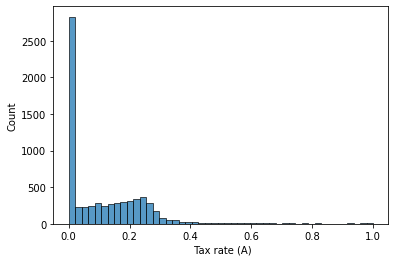

In [ ]:
# Generating a histplot with seaborn to visualize the distribution of Tax Rates.
sns.histplot(df[' Tax rate (A)'])

Surprisingly a vast majority of entries displayed a tax rate of 0. This could be due to missing data on a large number of the companies filled as 0, or the companies could have low tax rates due to other economic factors. We can also see some definite outliers in the distribution notably at the upper end with some values displaying 100 percent tax rates. Notably, the distribution is not normal. We will still process the outliers and gain what we can from the data instead of discarding it, through winsorization, during the next data cleaning phase.

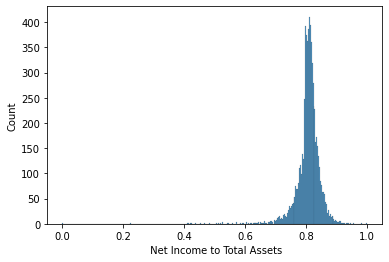

In [ ]:
# Generating a histogram with seaborn to visualize the distribution of Net Income to Total Assets.
sns.histplot(df[' Net Income to Total Assets'])

Looking at the heatmaps other features of interest in regards to our target variable of bankruptcy, we can see that the Net Income to Total Assets is showing roughly a normal distribution. This is also known as Return on Assets (ROA) and is a financial ratio that shows the percentage of profit a company earns in relation to its overall resources. Most companies listed have a net income to total asset ratio of 0.8. Notably this financial ratio shows strong correlation to our target variable as one would expect when considering the factors involved in declaring bankruptcy.

In [ ]:
# Descriptive statistics for all variables.
df.describe(include= 'all')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

Descriptive statistics are useful to get another feel for all features at a 
glance. We can look at minimum and maximum values for features of interest, as well as the mean and standard deviation. This can give us additional insights into features that might have outliers, such as the operating expense rate where we can see there is a maximum value far greater than the mean and minimum values, which is most certainly an outlier. We will explore outliers and their transformation during model preparation next as outliers can pose a potential problem for our machine learning algorithms, ultimately affecting the performance of our algorithm. These should be processed to gain the most predictive accuracy from our data. 

# Model Preparation

After Exploratory Data Analysis, the next crucial phase involves model preparation. This involves handling missing data, processing outliers as mentioned previously, class-balancing the target variable, as well as splitting the data into training and testing sets. Adequate model preparation is fundamental to attaining the best results from any predictive machine learning algorithm.

## Missing Values

Missing values can cause a wide range of problems when not processed correctly and can prevent necessary code from running altogether. First we need to examine our financial data for any missing values by using Pandas isnull function.

In [ ]:
# Creating a DataFrame to show the percentage of missing data from each individual feature.
missing_values = pd.DataFrame(df.isnull().mean() * 100)

In [ ]:
# Setting max rows to show all percent missing values in the dataframe we are creating next.
pd.set_option("max_rows", None)

In [ ]:
# Displaying percentage of all missing values.
missing_values

,0
Bankrupt?,0.0
ROA(C) before interest and depreciation before interest,0.0
ROA(A) before interest and % after tax,0.0
ROA(B) before interest and depreciation after tax,0.0
Operating Gross Margin,0.0
Realized Sales Gross Margin,0.0
Operating Profit Rate,0.0
Pre-tax net Interest Rate,0.0
After-tax net Interest Rate,0.0
Non-industry income and expenditure/revenue,0.0


In [ ]:
# Reset option to display all rows.
pd.reset_option('max_rows')

There are no missing values in this dataset, making it a little easier to work with. As shown above in our exploratory data analysis, we do have features of interest with a large presence of 0s recorded such as 'Tax Rate (A)' meaning these missing values have already been filled with 0 and require no further processing.

## Outlier Detection

An outlier is a data point that lies outside the overall pattern in a distribution. The presence of outliers can severely effect the performance of our machine learning models, so it is best to process them before feeding the data into your algorithm.

We will first examine normalized features for outliers by examining them visually with a generated boxplot, and then verifying their presence statistically. Normalized features consist of normalized data, meaning it has been rescaled to a range of 0 and 1. Data normalization is used in machine learning to make model training less sensitive to the scale of features. 

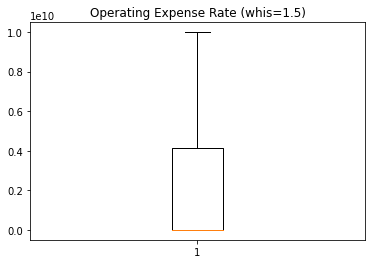

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features, such as Operating Expense Rate below. 
plt.boxplot(df[" Operating Expense Rate"])
plt.title("Operating Expense Rate (whis=1.5)")
plt.show()

The Operating Expense Rate feature is not showing any outliers outside of the interquartile range displayed on the boxplot. We would see points outside of the whiskers displayed as outliers if that were the case, meaning this feature requires no further processing and does not display any outliers. Let's look at the other variables that are displaying non-normalized data and see if they contain any outliers. 

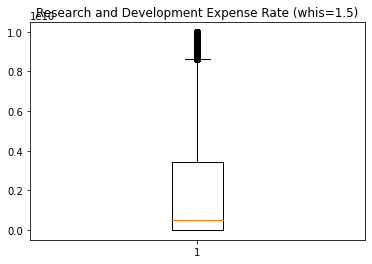

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Research and development expense rate"])
plt.title("Research and Development Expense Rate (whis=1.5)")
plt.show()

We can see the presence of some outliers displayed here in the top whisker of the boxplot for the 'research and development expense rate' feature. This indicates that there are values outside of the upper interquartile range. Let's verify this statistically next. 

In [ ]:
# Calculating the IQR using NumPy's percentile function, which returns the q-th percentile(s) of the array elements.
q75, q25 = np.percentile(df[" Research and development expense rate"], [75 ,25])
iqr = q75 - q25

# Creating a range of threshold values to test using NumPy in intervals of 0.5.
for threshold in np.arange(1,5,0.5):
# Creating minimum outlier threshold value.
    min_val = q25 - (iqr*threshold)
# Creating maximum outlier threshold value.
    max_val = q75 + (iqr*threshold)
# Printing score threshold and resulting number of outliers detected.
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df[" Research and development expense rate"] > max_val) 
                      | (df[" Research and development expense rate"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 494
The score threshold is: 1.5
Number of outliers is: 182
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


With a score threshold of 1.5 using the standard 1.5x(Interquartile Range) method for identifying outliers, we have 182 data entries that are recorded as outliers. Let's remove these to assist in the performance of our machine learning model by using SciPy's winsorize function. This limits the outliers to a defined threshold instead of completely removing them, allowing for the preservation of some data. This is a much better practice than removing outliers entirely. 

In [ ]:
# Importing SciPy's winsorize function to transform problematic outliers.
from scipy.stats.mstats import winsorize

df[" Research and development expense rate"] = winsorize(df[" Research and development expense rate"], (0, 0.10))

Now that we have effectively limited problematic outliers using SciPy's winsorize function, we will once again create a boxplot to confirm outlier removal. 

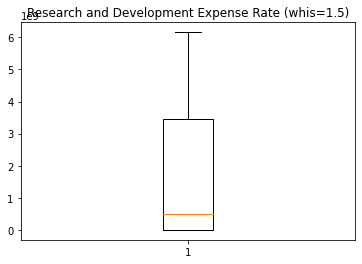

In [ ]:
# Creating another boxplot of Research and Development Expense Rate to confirm outlier removal.
plt.boxplot(df[" Research and development expense rate"])
plt.title("Research and Development Expense Rate (whis=1.5)")
plt.show()

As we can see in our second boxplot the outliers have been effectively transformed into less extreme values that allow for the retaining of some information from them. This is better for data preservation than just removing outlier entries entirely, ultimately increasing the performance of our machine learning algorithm.

Next, we will continue the same steps for all non-normalized data features by creating a simple boxplot to detect outliers via the Interquartile Range (IQR) and then removing them using SciPy's winsorize function where detected.

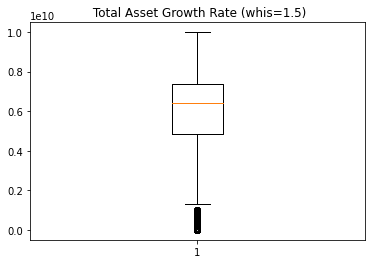

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Total Asset Growth Rate"])
plt.title(" Total Asset Growth Rate (whis=1.5)")
plt.show()

We have detected some outliers in the lower whisker of the boxplot, we'll winsorize all the features in need of outlier transformation that are displaying point outside of the whiskers of the boxplot.

In [ ]:
# Using SciPy's winsorize function to transform problematic outliers, we have adjusted the range of the winsorize function to completely elimate outliers on the lower end of the whisker.
df[" Total Asset Growth Rate"] = winsorize(df[" Total Asset Growth Rate"], (0.10, 0.30))

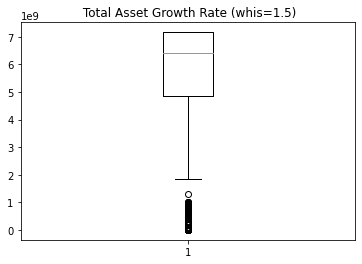

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Total Asset Growth Rate"])
plt.title(" Total Asset Growth Rate (whis=1.5)")
plt.show()

Great, we have effectively limited the outliers via transformation using SciPy's winsorize function once again.

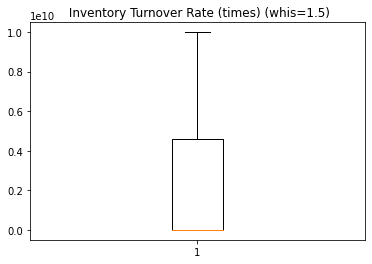

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Inventory Turnover Rate (times)"])
plt.title(" Inventory Turnover Rate (times) (whis=1.5)")
plt.show()

The inventory turnover rate is not displaying any outliers so we can choose to leave this feature alone.

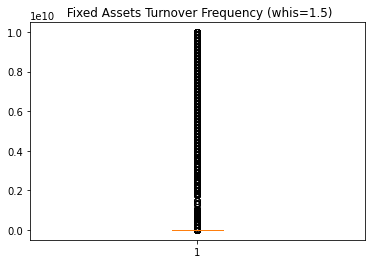

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Fixed Assets Turnover Frequency"])
plt.title(" Fixed Assets Turnover Frequency (whis=1.5)")
plt.show()

In [ ]:
# Using SciPy's winsorize function to transform problematic outliers, we have adjusted the range of the winsorize function to completely elimate outliers on the lower end of the whisker.
df[" Fixed Assets Turnover Frequency"] = winsorize(df[" Fixed Assets Turnover Frequency"], (0.10, 0.30))

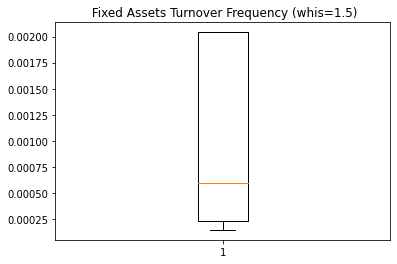

In [ ]:
# Confirming removal of outliers for non-normalized data features. 
plt.boxplot(df[" Fixed Assets Turnover Frequency"])
plt.title(" Fixed Assets Turnover Frequency (whis=1.5)")
plt.show()

Once again, we have eliminated problematic outliers from the fixed assets turnover frequency feature.

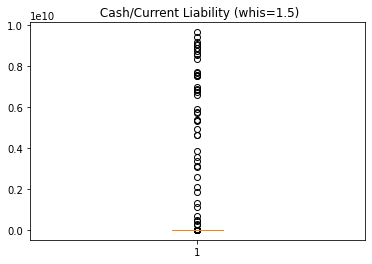

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Cash/Current Liability"])
plt.title(" Cash/Current Liability (whis=1.5)")
plt.show()

In [ ]:
# Using SciPy's winsorize function to transform problematic outliers, we have adjusted the range of the winsorize function to completely elimate outliers on the upper end of the whisker.
df[" Cash/Current Liability"] = winsorize(df[" Cash/Current Liability"], (0.10, 0.20))

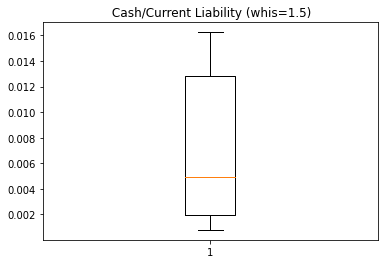

In [ ]:
# Creating a simple boxplot to confirm the transformation of outliers for non-normalized data features. 
plt.boxplot(df[" Cash/Current Liability"])
plt.title(" Cash/Current Liability (whis=1.5)")
plt.show()

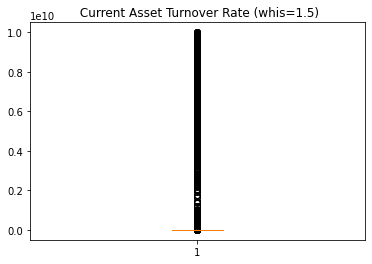

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Current Asset Turnover Rate"])
plt.title(" Current Asset Turnover Rate (whis=1.5)")
plt.show()

In [ ]:
# Using SciPy's winsorize function to transform problematic outliers, we have adjusted the range of the winsorize function to completely elimate outliers on the upper end of the whisker.
df[" Current Asset Turnover Rate"] = winsorize(df[" Current Asset Turnover Rate"], (0.10, 0.30))

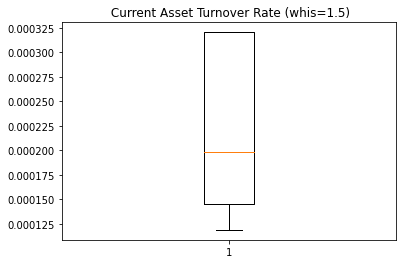

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Current Asset Turnover Rate"])
plt.title(" Current Asset Turnover Rate (whis=1.5)")
plt.show()

We have effectively transformed outliers for the Current Asset Turnover Rate.

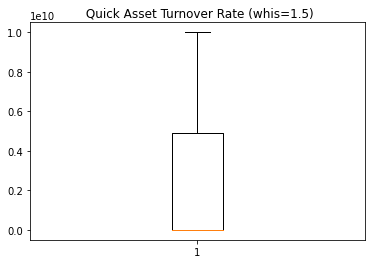

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Quick Asset Turnover Rate"])
plt.title(" Quick Asset Turnover Rate (whis=1.5)")
plt.show()

No outliers detected.

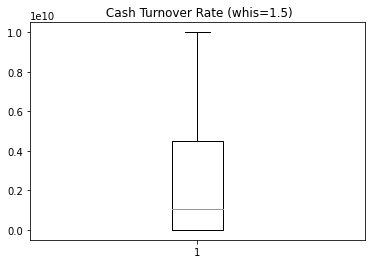

In [ ]:
# Creating a simple boxplot to detect the presence of outliers for non-normalized data features. 
plt.boxplot(df[" Cash Turnover Rate"])
plt.title(" Cash Turnover Rate (whis=1.5)")
plt.show()

No outliers detected.

Great, we have effectively processed outliers using NumPys winsorize function. Next, we will take a closer look at our target variable.

## Target Variable Class Balance

Imbalanced classification sets create a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. 

This results in models that have poor predictive performance, specifically for the minority class. This is bad because the minority class is usually more important and what we are trying to predict, causing the algorithm to be more sensitive to classification errors for the minority class than the majority class.

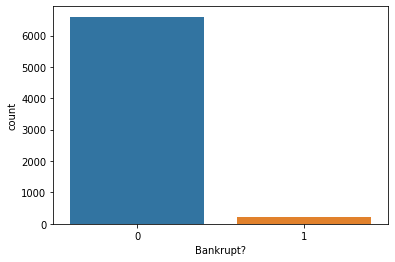

In [ ]:
# Creating a simple countplot with Seaborn to visualize the target variable of presence of bankruptcy.
sns.countplot(x ='Bankrupt?', data = df)

We can see that there is a heavy class imbalance as expected with this data. This is due to the amount of bankruptcy cases obviously being lower when compared to the overall population. 

Since in this case we are trying to predict the minority class, we will address this by class balancing using a synthetic minority approach, also known as synthetic minority oversampling technique (SMOTE).



In [ ]:
# y is our target variable employee churn. We drop our target from X.
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])

# Class balancing the target using SMOTE, we will use the minority sampling class strategy since we want to oversample our smaller target variable class.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit SMOTE to our X and y variables.
X, y = sm.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


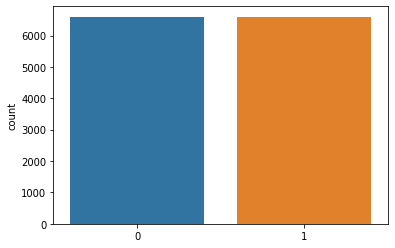

In [ ]:
# Creating a simple countplot with Seaborn to visualize the target variable of presence of bankruptcy after class balancing.
sns.countplot(y)

Great, we can see in the subsequent visualization of the target variable of bankruptcy that SMOTE has effectively eliminated our class balancing issue using synthetically created data from our minority class. Our data is now cleaned, prepared, and ready to be split into training and test sets to be used in our machine learning models.

## Train-Test-Split

In [ ]:
# Splitting dataset into a training set and test set using a test size of 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Now that we have split our dataset into training and test sets, we are ready to develop machine learning models that will use these newly created sets to score the performance of our machine learning models. We will compare many different models and see which runs the best in regards to runtime and classification report scoring.

# Machine Learning Model Development

## Machine Learning Models without Feature Selection

### Logistic Regression Classifier

Logistic Regression has a long history of use in the financial industry and is one of the classical machine learning models. The use of logistic regression for bankruptcy prediction can be traced back to almost 50 years ago when use began in the 1970's. It is still useful in some cases, but has seen less use in recent years as machine learning models grow in complexity and performance capabilities such as the advent of decision trees, neural networks, and SVM in the 1990's. Logistic Regression Classification is also known as a linear classifier.

In [ ]:
# Timing our model.
start_time = time.time()

# Adjust our max iteration value, 100 is too low and gives errors.
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 1.153 seconds ---


In [ ]:
# Cross validation score for Logistic Regression Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.55492424, 0.5217803 , 0.53977273, 0.55871212, 0.55681818,
       0.53693182, 0.54640152, 0.55397727, 0.55165877, 0.56492891])

In [ ]:
# Building classification report for our logistic regression classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.5329545454545455
Classification report:
              precision    recall  f1-score   support

           0       0.53      0.69      0.60      1334
           1       0.54      0.37      0.44      1306

    accuracy                           0.53      2640
   macro avg       0.53      0.53      0.52      2640
weighted avg       0.53      0.53      0.52      2640

Confusion matrix:
[[920 414]
 [819 487]]


The logistic regression classification model without any feature selection is having a difficult time predicting bankruptcy in this case, with low levels of recall and accuracy notably. 

This is due to the noise in the data without feature selection, and as logistic regression classification is a linear classifier, it is having a hard time linearly separating the data for classification. Let's continue to see if our other models have any better results.

### Gradient Boosting Classifier

Gradient boosting is an ensemble learning method. Nanni and Lumini (2009) conducted a series of experiments on financial datasets
including Australian credit data, German credit data and Japanese credit data, and finally found that ensemble methods
led to a better classification performance than stand-alone models in bankruptcy prediction. 

Boosting is a technique that first obtains a
base classifier from the initial dataset, then adjusts the distribution of the training dataset based on the performance
of the base classifier, and then trains the next base classifier with the adjusted sample distribution. 

It assigns a weight
to each set of training, which can be used to design a set of bootstrap samples from the original data.

In [ ]:
# Timing our model.
start_time = time.time()

# Creating gradient boost classifier.
clf = GradientBoostingClassifier()

# Fitting model to our data.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 36.032 seconds ---


In [ ]:
# Cross validation score for Gradient Boosting Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.9782197 , 0.9592803 , 0.97443182, 0.97064394, 0.96969697,
       0.96685606, 0.95359848, 0.97537879, 0.96398104, 0.97440758])

In [ ]:
# Classification report for our Gradient Boosting classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.968560606060606
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1334
           1       0.95      0.99      0.97      1306

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640

Confusion matrix:
[[1267   67]
 [  16 1290]]


As expected based on research detailed in the literature on machine learning models and financial data, the gradient boosting classifier performed well on the financial data at hand, although with a rather long runtime of over 30 seconds. This is still a well performing model, although other machine learning models will likely demonstrate the same or similar performance metrics with a vastly shorter longtime in comparison.

### KNN Classifier

KNN or K-Nearest Neighbors classification does not traditionally have much use in the financial industry, there are some implementations of KNN which are better suited but still do not demonstrate the performance capabilities of other models, such as fuzzy KNN which have been researched more extensively. 

These variations still do not improve performance scoring extensively and instead serve to improve cross-validation scoring performance and increase performance in terms of handling new incoming data better. We will demonstrate the performance of KNN classication next.

KNN is highly dependent on the number of neighbors used, or the K-value. We will use GridSearchCV to find the best k-value.


In [ ]:
# Creating KNN classifier for GridSearchCV to run.
knn = KNeighborsClassifier()

# We are looking at the n_neighbors paramater which defines the K value to see what works best with our model.
knn_para = {'n_neighbors':[1,2,3,5,7,9,11,13,15,17,19]}

# Creating GridSearchCV with KNN parameters and a cross-validation number of 5. 
clf = GridSearchCV(knn, knn_para, cv=5)

# Fitting GridSearchCV to training set.
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Calling GridSearchCV best_params_ function to determine the best parameters gathered.
clf.best_params_

{'n_neighbors': 1}

The best K value for our K-Nearest Neighbors classifier in this case is going to be 1. GridSearchCV determines this by finding the best mean test scoring in the number of cross-validations specified, in this case 5. 

In [ ]:
# Timing our model.
start_time = time.time()

# Create the KNN Classifier with parameters from GridSearchCV.
knn = KNeighborsClassifier(n_neighbors=1)

#Train our model.
knn.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.152 seconds ---


In [ ]:
# Cross validation score for KNN.
cross_val_score(knn, X_train, y_train, cv=10)

array([0.92424242, 0.9280303 , 0.94318182, 0.93465909, 0.91666667,
       0.92518939, 0.92424242, 0.94507576, 0.93649289, 0.93649289])

Cross-validation scoring for KNN classification is consistent and demonstrates similar performance in the classification report. Fuzzy KNN may have elimiated the range of cross-validation scoring to about 1% instead of 3%. If this initial KNN model proved to be of oustanding performance, futher research could involve developing a fuzzy KNN classifier for this data. However, the performance metrics are not showing strong enough results to continue.

In [ ]:
# Classification report for our KNN classifier.
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9397727272727273
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1334
           1       0.91      0.98      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

Confusion matrix:
[[1202  132]
 [  27 1279]]


Model performance for KNN classifier is moderate with a classification report just under the top performing model so far of 94%. It also demonstrates a remarkably fast runtime, and consistent cross-validation scoring in it's performance range of about 3%. 

However, in this application, runtime is not as important as predictive accuracy, so it isn't likely that we would use this model in production.

### Decision Tree Classifier

The decision tree classifier is not an ensemble method and uses a single decision tree to generate it's predictions. This decision tree can differentiate with each iteration. 

While this proves great performance in some cases, it often makes the Decision Tree a last choice for a final machine learning model due to the belief that an ensemble of trees will always perform better than a single decision tree. 

It is always best to test this hypothesis by building both models and comparing them both with GridSearchCV implementations. This eliminates any guesswork and gives concrete metrics to base a decision between either of the two models. 

In [ ]:
# Creating initial tree for GridSearchCV to run.
decision_tree = tree.DecisionTreeClassifier()

# We are looking at a few parameters to see what works best with our model.
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[10,50,250,500],
             'max_features':[10,50,90]}
clf = GridSearchCV(decision_tree, tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
# Calling best_params_ to find best parameters from GridSearchCV.
clf.best_params_

{'criterion': 'entropy', 'max_depth': 500, 'max_features': 50}

In [ ]:
# Timing our model.
start_time = time.time()

# Initialize and train our tree using best parameters from GridSearchCV.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=500,
    max_features=50,
)
decision_tree.fit(X_train, y_train)

# Print model runtime. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.912 seconds ---


In [ ]:
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.96685606, 0.95170455, 0.96117424, 0.96022727, 0.95265152,
       0.95643939, 0.96496212, 0.96022727, 0.94028436, 0.96018957])

In [ ]:
# Print accuracy score, confusion matrix, and classification report metrics for our Decision Tree.
y_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", dt_accuracy)
print("Classification report:")
print(decision_tree_report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9564393939393939
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1334
           1       0.94      0.97      0.96      1306

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

Confusion matrix:
[[1255   79]
 [  36 1270]]


In this case our Decision Tree model is performing very well with excellent runtimes, consisten cross-validation scoring, and a classification report that is not showing any signs of overfitting. It has a slightly longer runtime than the previous KNN classifier but higher accuracy.

### RandomForest Classifier

Random Forest is an ensemble model in this case an emsemble of Decision Trees. Random Forest models use Bagging to resample the dataset using a random subsample to generate many different decision tree models. Without this feature of bagging, the Random Forest generated would be a forest of similar decision trees and not provide any useful data.

The performance of Random Forest Classification is highly dependent on the hyperparameters specified when building the model. There are roughly 15 hyperparameters that can be tested in all their configurations with GridSearchCV if you have time to run such an exhaustive search. This allows you to find the best combination of hyperparameters in a more efficient manner than simply trying different hyperparameters to see which works best. We will create a moderately demanding parameter grid demonstrating the capabilities of GridSearchCV when designing a random forest classifier. 

In [ ]:
# Creating a Random Forest Classifier to use with GridSearchCV.
rfc = ensemble.RandomForestClassifier()

# Creating a parameter grid to find best combination of hyperparameters. 
param_grid = { 
    'n_estimators': [10,100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,50,90],
    'criterion' :['gini', 'entropy']
}

# Using GridSearchCV to find best hyperparamater combination.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

# Fitting GridSearchCV to our newly decomposed data.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Calling best_params_ to find best parameters from GridSearchCV.
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 500}

Now that we have the most optimized hyperparameters from GridSearchCV we can use these to build our model and score the performance.

In [ ]:
# Timing our model.
start_time = time.time()

# Creating our model using optimized hyperparameters from GridSearchCV.
rfc = ensemble.RandomForestClassifier(criterion='gini', 
                                      max_depth=50,
                                      max_features='auto',
                                      n_estimators=500, random_state=42)

# Fit our newly decomposed data to our model.
rfc.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 46.7 seconds ---


Model runtime is much longer in comparison to our Decision Tree model. This is due to the Random Forest modeling being more computationally intensive as it has to generate a multitude of Decision Trees instead of just one.

In [ ]:
# Cross-valdiation score for our Random Forest Classifier.
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.98674242, 0.97537879, 0.98200758, 0.98295455, 0.97443182,
       0.9782197 , 0.96780303, 0.98390152, 0.98293839, 0.98578199])

The cross-validation scoring is very consistent and shows that our model is performing well on the training set when split into ten cross-validation cycles. This model will be able to handle incoming new data well accorind to this scoring report.

In [ ]:
# Print classification report for Random Forest Classifier.
y_pred = rfc.predict(X_test) 
rfc_accuracy = accuracy_score(y_test,y_pred)
rfc_report = classification_report(y_test, y_pred)
rfc_cm = confusion_matrix(y_test, y_pred)

print("Classification report:")
print("Accuracy: ", rfc_accuracy)
print(rfc_report)
print("Confusion matrix:")
print(rfc_cm)

Classification report:
Accuracy:  0.9821969696969697
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1334
           1       0.97      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Confusion matrix:
[[1291   43]
 [   4 1302]]


Great, we have boosted model performance significantly in comparison to our Decision Tree model with an overall boost in weighted average scoring and accuracy scoring of about 3%. This demonstrates that Random Forest modeling can perform better than Decision Trees but at the cost of a longer runtime and increased computational costs. In this case, as a financial instrument and tool to detect bankruptcy, this increased performance is well worth the increased runtime. Although it might seem like a minor improvement in performance for increased computational costs, the money that could be saved from detecting just one additional bankruptcy would easily outset the cost of running the model continuously. This is why hyperparameter tuning is a must for running a computationally complex model such as Random Forest.

## XGBoost Classifer

XGBoost stands for "Extreme Gradient Boosting" and is one of the newer supervised machine learning models which has seen a surge in popularity. This is due to XGBoost usually performing very well on complex datasets and scales easily.

XGBoost uses an ensemble of decision trees and a regularization term to create models that perform well in the wild. The regularization is one part most tree packages treat less carefully, or simply ignore, which is what makes XGBoost unique.

XGBoost, like Decision Tree and Random Forest models, are highly dependent on the hyperparameters specified when building the model. We will first build a model without hyperparameter tuning to see what results we get and then implement a RandomizedSearchCV function to find the best combination of parameters.

In [ ]:
# Building XGBoost classifier.
clf = xgb.XGBClassifier()

# Timing our model.
start_time = time.time()

# Creating our XGBoost model.
clf = xgb.XGBClassifier()

# Fit our newly decomposed data to our model.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 6.403 seconds ---


In [ ]:
# Cross-valdiation score for our XGBoost Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.9782197 , 0.96212121, 0.97632576, 0.96969697, 0.96685606,
       0.96969697, 0.95359848, 0.97253788, 0.96777251, 0.97251185])

In [ ]:
# Print classification report for our XGBoost classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9678030303030303
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1334
           1       0.95      0.99      0.97      1306

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640

Confusion matrix:
[[1264   70]
 [  15 1291]]


### XGBoost with RandomizedSearchCV

In [ ]:
# Create parameter grid for RandomizedSearchCV.
parameters = {'n_estimators':[250,500,1000],
              'max_depth':[10,25,50,91],
              'learning_rate':[0.01,0.1],
              'subsample':[0.5,1],
              'colsample_bytree':[1,0.5],
              'gamma':[0.5,1],
              'min_child_weight':[1,2]
              }

# Create decision tree classifier with RandomizedSearchCV.
CV_clf = RandomizedSearchCV(clf, parameters, random_state=0)

# Fitting decision tree classifier to training data.
CV_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
# Calling .best_params_ to pull best parameters from RandomizedSearchCV.
CV_clf.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 1000,
 'subsample': 0.5}

In [ ]:
# Timing our model.
start_time = time.time()

# Building XGBoost classifier.
clf = xgb.XGBClassifier(
    colsample_bytree=0.5,
    gamma=0.5,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=2,
    n_estimators=1000,
    subsample=0.5,)

# Fit our newly decomposed data to our model.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 43.673 seconds ---


In [ ]:
# Cross-valdiation score for our XGBoost Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.99242424, 0.98579545, 0.98863636, 0.98863636, 0.98484848,
       0.98579545, 0.98011364, 0.98484848, 0.99146919, 0.98672986])

Cross-validation scoring is excellent, XGBoost is displaying consistent CV scoring across all cycles with no signs of overfitting such as displaying 1.0 CV score.

In [ ]:
# Print classification report for our XGBoost classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9875
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1334
           1       0.98      1.00      0.99      1306

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640

Confusion matrix:
[[1304   30]
 [   3 1303]]


The results offered by this dataset and XGBoost ensemble method are very similar to the random forest models performance, but XGBoost offers a stronger result and performance. Notably we increased performance by 2% with our hyperparameter search when we were already at 96% accuracy which is great performance in this business use case. Our model performance is almost perfect at roughly 99% accuracy using XGBoost. The only downside is the increased runtime but this is a worthy tradeoff. This showcases the abilities of XGBoost to predict accurately using complex datasets and why it is considered to be a top performing machine learning algorithm.

# SelectKBest Feature Selection

Reducing feature dimensions by choosing the most relevant features based on K value with sklearn's SelectKBest function can improve model runtime and increase performance in some areas of performance metrics. This can be especially useful for large datasets and functions where runtime is an essential component to the success of the model. 

In [ ]:
# Examining initial X DataFrame shape.
X.shape 

(13198, 95)

In [ ]:
# y is our target variable of bankruptcy. We drop our target from X.
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])

# Run our selector using f_classif for our classification task. We will use the default K value of 10 in this case which will reduce features to that number.
selector = SelectKBest(f_classif).fit(X, y)

# Create boolean values to select features from original feature set using get_support.
boolean = selector.get_support()

# Our new X variable now consists of our selected best features based on K value.
X_skb = X[X.columns[boolean]]

# Class balancing using SMOTE.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fitting SMOTE to resample our target class.
X_skb, y = sm.fit_resample(X_skb, y)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [93] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Examining new X DataFrame shape.
X_skb.shape

(13198, 10)

We have effectively created a new X variable set with SelectKBest and we are showing a new X feature set with 10 features instead of 95 like previous models. 

### Train-Test-Split

In [ ]:
# Let's split our data, this time using our newly selected features.
X_train, X_test, y_train, y_test = train_test_split(X_skb, y, test_size=0.20, random_state=42)

# Machine Learning Models with Select K Best Feature Selection

## Logistic Regression Classifier

In [ ]:
# Timing our model.
start_time = time.time()

# Adjust our max iteration value, 100 is too low and gives errors.
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.063 seconds ---


In [ ]:
# Cross validation score for Logistic Regression Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.86268939, 0.85890152, 0.85511364, 0.87121212, 0.85984848,
       0.83522727, 0.85227273, 0.86363636, 0.86729858, 0.87014218])

In [ ]:
# Building classification report for our logistic regression classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.8571969696969697
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1334
           1       0.84      0.88      0.86      1306

    accuracy                           0.86      2640
   macro avg       0.86      0.86      0.86      2640
weighted avg       0.86      0.86      0.86      2640

Confusion matrix:
[[1119  215]
 [ 162 1144]]


The logistic regression classification model without any feature selection was having a difficult time predicting bankruptcy, with low levels of recall and accuracy notably of about 53%. This is a significant performance increase, with an accuracy scoring of roughly 86% and consistent cross-validation scoring. Runtime is also significantly reduced from a previous runtime without feature selection of 1.1 seconds, to 0.063 seconds with SelectKBest feature selection. This is a runtime decrease of around 94% while signficantly increasing performance. This demonstrates that the most computationally intensive option will not always provide the best results and data preparation is key for some models performance.

By refining the data with SelectKBest feature selection, we have shown the importance of eliminating noise from the dataset for some models such as logistic regression. Since logistic regression looks for a linearly separable decision boundary, it makes since that our initial model was having a difficult time finding a linear boundary within so many data points without feature selection.

Still performance leaves much to be desired especially in comparison to other methods outlined previously.

## Gradient Boosting Classifier

In [ ]:
# Timing our model.
start_time = time.time()

# Creating gradient boost classifier.
clf = GradientBoostingClassifier()

# Fitting model to our data.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 3.958 seconds ---


In [ ]:
# Cross validation score for Gradient Boosting Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.90719697, 0.89772727, 0.90719697, 0.91098485, 0.89867424,
       0.89583333, 0.90435606, 0.91098485, 0.91090047, 0.92417062])

In [ ]:
# Classification report for our Gradient Boosting classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9034090909090909
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1334
           1       0.88      0.93      0.90      1306

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

Confusion matrix:
[[1175  159]
 [  96 1210]]


Compared to our initial Gradient Boosting classification model, this model is showing a reduction in runtime but with a decrease in performance metrics. This model will likely not be used in production as the models advantage of reduced runtime is not worth the loss in accuracy and various other performance metrics overall. 

## KNN Classifier

KNN is highly dependent on the number of neighbors used, or the K-value. We will use GridSearchCV again to find the best k-value.


In [ ]:
# Creating KNN classifier for GridSearchCV to run.
knn = KNeighborsClassifier()

# We are looking at the n_neighbors paramater which defines the K value to see what works best with our model.
knn_para = {'n_neighbors':[1,2,3,5,7,9,11,13,15,17,19]}

# Creating GridSearchCV with KNN parameters and a cross-validation number of 5. 
clf = GridSearchCV(knn, knn_para, cv=5)

# Fitting GridSearchCV to training set.
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Calling GridSearchCV best_params_ function to determine the best parameters gathered.
clf.best_params_

{'n_neighbors': 2}

The best K value for our K-Nearest Neighbors classifier in this case is going to be 2. GridSearchCV determines this by finding the best mean test scoring in the number of cross-validations specified, in this case 5. 

In [ ]:
# Timing our model.
start_time = time.time()

# Create the KNN Classifier with parameters from GridSearchCV.
knn = KNeighborsClassifier(n_neighbors=2)

#Train our model.
knn.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.021 seconds ---


In [ ]:
# Cross validation score for KNN.
cross_val_score(knn, X_train, y_train, cv=10)

array([0.95170455, 0.95833333, 0.95454545, 0.96117424, 0.95075758,
       0.95643939, 0.95075758, 0.96401515, 0.9478673 , 0.96398104])

Cross-validation scoring for KNN classification is consistent and demonstrates similar performance in the classification report. We've improved performance metrics by about 3%, a marked increase than our KNN model before feature selection. 

In [ ]:
# Classification report for our KNN classifier.
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9397727272727273
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1334
           1       0.91      0.98      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

Confusion matrix:
[[1202  132]
 [  27 1279]]


Model performance for KNN classifier is moderate with a classification report just under the top performing models of 94%. It also demonstrates a fast runtime, and more consistent cross-validation scoring when compared to the previous model without feature selection. SelectKBest in this case was able to improve the cross-validation scoring performance and improve the runtime dramatically, but the classification report performance stayed the same.

## Decision Tree Classifier

In [ ]:
# Creating initial tree for GridSearchCV to run.
decision_tree = tree.DecisionTreeClassifier()

# We are looking at a few parameters to see what works best with our model.
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[10,50,250,500],
             'max_features':[3,5,7,9,10]}
clf = GridSearchCV(decision_tree, tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
# Calling best_params_ to find best parameters from GridSearchCV.
clf.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 7}

In [ ]:
# Timing our model.
start_time = time.time()

# Initialize and train our tree using best parameters from GridSearchCV.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=50,
    max_features=7,
)
decision_tree.fit(X_train, y_train)

# Print model runtime. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.194 seconds ---


In [ ]:
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.93939394, 0.92329545, 0.94507576, 0.93560606, 0.93560606,
       0.93371212, 0.93465909, 0.94223485, 0.94123223, 0.94123223])

In [ ]:
# Print accuracy score, confusion matrix, and classification report metrics for our Decision Tree.
y_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", dt_accuracy)
print("Classification report:")
print(decision_tree_report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9359848484848485
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1334
           1       0.92      0.95      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

Confusion matrix:
[[1227  107]
 [  62 1244]]


In this case our Decision Tree model is performing very well with excellent runtimes, consisten cross-validation scoring, and a classification report that is not showing any signs of overfitting. There is some reduction in performance due to data lost during feature selection.

## RandomForest Classifier

In [ ]:
# Creating a Random Forest Classifier to use with GridSearchCV.
rfc = ensemble.RandomForestClassifier()

# Creating a parameter grid to find best combination of hyperparameters. 
param_grid = { 
    'n_estimators': [10,100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,6,9,10],
    'criterion' :['gini', 'entropy']
}

# Using GridSearchCV to find best hyperparamater combination.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

# Fitting GridSearchCV to our newly decomposed data.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Calling best_params_ to find best parameters from GridSearchCV.
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500}

Now that we have the most optimized hyperparameters from GridSearchCV we can use these to build our model and score the performance.

In [ ]:
# Timing our model.
start_time = time.time()

# Creating our model using optimized hyperparameters from GridSearchCV.
rfc = ensemble.RandomForestClassifier(criterion='gini', 
                                      max_depth=10,
                                      max_features='log2',
                                      n_estimators=500, random_state=42)

# Fit our newly decomposed data to our model.
rfc.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 13.464 seconds ---


Model runtime is much longer in comparison to our Decision Tree model. This is due to the Random Forest modeling being more computationally intensive as it has to generate a multitude of Decision Trees instead of just one.

In [ ]:
# Cross-valdiation score for our Random Forest Classifier.
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.95265152, 0.93844697, 0.94981061, 0.94791667, 0.93276515,
       0.94034091, 0.94507576, 0.95170455, 0.94691943, 0.95545024])

The cross-validation scoring is very consistent and shows that our model is performing well on the training set when split into ten cross-validation cycles. This model will be able to handle incoming new data well accorind to this scoring report.

In [ ]:
# Print classification report for Random Forest Classifier.
y_pred = rfc.predict(X_test) 
rfc_accuracy = accuracy_score(y_test,y_pred)
rfc_report = classification_report(y_test, y_pred)
rfc_cm = confusion_matrix(y_test, y_pred)

print("Classification report:")
print("Accuracy: ", rfc_accuracy)
print(rfc_report)
print("Confusion matrix:")
print(rfc_cm)

Classification report:
Accuracy:  0.9454545454545454
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1334
           1       0.92      0.97      0.95      1306

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

Confusion matrix:
[[1227  107]
 [  37 1269]]


Great, we have boosted model performance in comparison to our Decision Tree model with an overall boost in weighted average scoring and accuracy scoring of about 1%. The increase in performance is not as major as we saw without feature selection especially in comparison to the still signficantly increased runtime of the Random Forest classifier with SelectKBest.

## XGBoost Classifer

XGBoost stands for "Extreme Gradient Boosting" and is one of the newer supervised machine learning models which has seen a surge in popularity. This is due to XGBoost usually performing very well on complex datasets such as the financial data at hand.

XGBoost uses an ensemble of decision trees and a regularization term to create models that perform well in the wild. The regularization is one part most tree packages treat less carefully, or simply ignore, which is what makes XGBoost unique.

XGBoost, like Decision Tree and Random Forest models, are highly dependent on the hyperparameters specified when building the model. We will first build a model without hyperparameter tuning to see what results we get and then implement a RandomizedSearchCV function to find the best combination of parameters.

In [ ]:
# Building XGBoost classifier.
clf = xgb.XGBClassifier()

# Timing our model.
start_time = time.time()

# Creating our XGBoost model.
clf = xgb.XGBClassifier()

# Fit our newly decomposed data to our model.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.944 seconds ---


In [ ]:
# Cross-valdiation score for our XGBoost Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.89962121, 0.89772727, 0.89299242, 0.89867424, 0.88541667,
       0.88636364, 0.8967803 , 0.89299242, 0.9042654 , 0.92037915])

In [ ]:
# Print classification report for our XGBoost classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.8943181818181818
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1334
           1       0.87      0.92      0.90      1306

    accuracy                           0.89      2640
   macro avg       0.90      0.89      0.89      2640
weighted avg       0.90      0.89      0.89      2640

Confusion matrix:
[[1155  179]
 [ 100 1206]]


### XGBoost with RandomizedSearchCV

In [ ]:
# Create parameter grid for RandomizedSearchCV.
parameters = {'n_estimators':[250,500,1000],
              'max_depth':[2,3,5,7,9,10],
              'learning_rate':[0.01,0.1],
              'subsample':[0.5,1],
              'colsample_bytree':[1,0.5],
              'gamma':[0.5,1],
              'min_child_weight':[1,2]
              }

# Create decision tree classifier with RandomizedSearchCV.
CV_clf = RandomizedSearchCV(clf, parameters, random_state=0)

# Fitting decision tree classifier to training data.
CV_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
# Calling .best_params_ to pull best parameters from RandomizedSearchCV.
CV_clf.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 0.5}

In [ ]:
# Timing our model.
start_time = time.time()

# Building XGBoost classifier.
clf = xgb.XGBClassifier(
    colsample_bytree=0.5,
    gamma=1,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=1,
    n_estimators=500,
    subsample=0.5,)

# Fit our newly decomposed data to our model.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 7.646 seconds ---


In [ ]:
# Cross-valdiation score for our XGBoost Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.9782197 , 0.96212121, 0.97632576, 0.96969697, 0.96685606,
       0.96969697, 0.95359848, 0.97253788, 0.96777251, 0.97251185])

In [ ]:
# Print classification report for our XGBoost classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9625
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1334
           1       0.94      0.98      0.96      1306

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640

Confusion matrix:
[[1257   77]
 [  22 1284]]


# PCA Feature Decomposition

In [ ]:
# Examining initial X DataFrame shape.
X.shape 

(13198, 95)

In [ ]:
# y is our target variable of bankruptcy. We drop our target from X.
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])

# Apply SMOTE to fix class imbalance.
sm = SMOTE(sampling_strategy='minority', random_state=42)

X, y = sm.fit_resample(X, y)

# First we must scale our data so that it can be fit into our PCA model.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA to our scaled data.
sklearn_pca = PCA(n_components = 0.95)
X_pca = sklearn_pca.fit_transform(scaled_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# PCA has reduced our number of features to 51 to explain 95% of variance.
X_pca.shape

(13198, 51)

In [ ]:
# Split PCA data.

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42)

## Machine Learning Models with PCA Feature Decomposition

### Logistic Regression Classifier

In [ ]:
# Timing our model.
start_time = time.time()

# Adjust our max iteration value, 100 is too low and gives errors.
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.419 seconds ---


In [ ]:
# Cross validation score for Logistic Regression Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.90151515, 0.90151515, 0.90246212, 0.90814394, 0.89393939,
       0.89583333, 0.89393939, 0.90909091, 0.89099526, 0.92132701])

In [ ]:
# Building classification report for our logistic regression classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9045454545454545
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1334
           1       0.89      0.93      0.91      1306

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.90      2640

Confusion matrix:
[[1177  157]
 [  95 1211]]


The logistic regression classification model without any feature selection was having a difficult time predicting bankruptcy, with low levels of recall and accuracy notably of about 53%. This is a significant performance increase, with an accuracy scoring of roughly 86% and consistent cross-validation scoring. Runtime is also significantly reduced from a previous runtime without feature selection of 1.1 seconds, to 0.063 seconds with SelectKBest feature selection. This is a runtime decrease of around 94% while signficantly increasing performance. This demonstrates that the most computationally intensive option will not always provide the best results and data preparation is key for some models performance.

By refining the data with SelectKBest feature selection, we have shown the importance of eliminating noise from the dataset for some models such as logistic regression. Since logistic regression looks for a linearly separable decision boundary, it makes since that our initial model was having a difficult time finding a linear boundary within so many data points without feature selection.

Still performance leaves much to be desired especially in comparison to other methods outlined previously.

### Gradient Boosting Classifier

In [ ]:
# Timing our model.
start_time = time.time()

# Creating gradient boost classifier.
clf = GradientBoostingClassifier()

# Fitting model to our data.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 28.011 seconds ---


In [ ]:
# Cross validation score for Gradient Boosting Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.95170455, 0.95170455, 0.95454545, 0.95359848, 0.93655303,
       0.93939394, 0.93844697, 0.9469697 , 0.93744076, 0.95545024])

In [ ]:
# Classification report for our Gradient Boosting classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9492424242424242
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1334
           1       0.92      0.98      0.95      1306

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

Confusion matrix:
[[1222  112]
 [  22 1284]]


Compared to our initial Gradient Boosting classification model, this model is showing a reduction in runtime but with a decrease in performance metrics. This model will likely not be used in production as the models advantage of reduced runtime is not worth the loss in accuracy and various other performance metrics overall. 

### KNN Classifier

KNN is highly dependent on the number of neighbors used, or the K-value. We will use GridSearchCV again to find the best k-value.


In [ ]:
# Creating KNN classifier for GridSearchCV to run.
knn = KNeighborsClassifier()

# We are looking at the n_neighbors paramater which defines the K value to see what works best with our model.
knn_para = {'n_neighbors':[1,2,3,5,7,9,11,13,15,17,19]}

# Creating GridSearchCV with KNN parameters and a cross-validation number of 5. 
clf = GridSearchCV(knn, knn_para, cv=5)

# Fitting GridSearchCV to training set.
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Calling GridSearchCV best_params_ function to determine the best parameters gathered.
clf.best_params_

{'n_neighbors': 2}

The best K value for our K-Nearest Neighbors classifier in this case is going to be 2. GridSearchCV determines this by finding the best mean test scoring in the number of cross-validations specified, in this case 5. 

In [ ]:
# Timing our model.
start_time = time.time()

# Create the KNN Classifier with parameters from GridSearchCV.
knn = KNeighborsClassifier(n_neighbors=2)

#Train our model.
knn.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.075 seconds ---


In [ ]:
# Cross validation score for KNN.
cross_val_score(knn, X_train, y_train, cv=10)

array([0.97916667, 0.97727273, 0.96306818, 0.97253788, 0.96401515,
       0.96496212, 0.96496212, 0.9782197 , 0.97725118, 0.98104265])

Cross-validation scoring for KNN classification is consistent and demonstrates similar performance in the classification report. We've improved performance metrics by about 3%, a marked increase than our KNN model before feature selection. 

In [ ]:
# Classification report for our KNN classifier.
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9727272727272728
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1334
           1       0.95      1.00      0.97      1306

    accuracy                           0.97      2640
   macro avg       0.97      0.97      0.97      2640
weighted avg       0.97      0.97      0.97      2640

Confusion matrix:
[[1263   71]
 [   1 1305]]


Model performance for KNN classifier is moderate with a classification report just under the top performing models of 94%. It also demonstrates a fast runtime, and more consistent cross-validation scoring when compared to the previous model without feature selection. SelectKBest in this case was able to improve the cross-validation scoring performance and improve the runtime dramatically, but the classification report performance stayed the same.

### Decision Tree Classifier

In [ ]:
# Creating initial tree for GridSearchCV to run.
decision_tree = tree.DecisionTreeClassifier()

# We are looking at a few parameters to see what works best with our model.
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[10,50,250,500],
             'max_features':[10,25,51]}
clf = GridSearchCV(decision_tree, tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [ ]:
# Calling best_params_ to find best parameters from GridSearchCV.
clf.best_params_

{'criterion': 'entropy', 'max_depth': 500, 'max_features': 10}

In [ ]:
# Timing our model.
start_time = time.time()

# Initialize and train our tree using best parameters from GridSearchCV.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=500,
    max_features=10,
)
decision_tree.fit(X_train, y_train)

# Print model runtime. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 0.352 seconds ---


In [ ]:
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.92329545, 0.92424242, 0.94981061, 0.93371212, 0.9375    ,
       0.91761364, 0.93087121, 0.93655303, 0.93838863, 0.94976303])

In [ ]:
# Print accuracy score, confusion matrix, and classification report metrics for our Decision Tree.
y_pred = decision_tree.predict(X_test)
dt_accuracy = accuracy_score(y_test,y_pred)
decision_tree_report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", dt_accuracy)
print("Classification report:")
print(decision_tree_report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9409090909090909
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1334
           1       0.93      0.95      0.94      1306

    accuracy                           0.94      2640
   macro avg       0.94      0.94      0.94      2640
weighted avg       0.94      0.94      0.94      2640

Confusion matrix:
[[1238   96]
 [  60 1246]]


In this case our Decision Tree model is performing very well with excellent runtimes, consistent cross-validation scoring, and a classification report that is not showing any signs of overfitting. There is some reduction in performance due to data lost during feature selection.

### RandomForest Classifier

In [ ]:
# Creating a Random Forest Classifier to use with GridSearchCV.
rfc = ensemble.RandomForestClassifier()

# Creating a parameter grid to find best combination of hyperparameters. 
param_grid = { 
    'n_estimators': [10,100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,30,40,51],
    'criterion' :['gini', 'entropy']
}

# Using GridSearchCV to find best hyperparamater combination.
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

# Fitting GridSearchCV to our newly decomposed data.
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Calling best_params_ to find best parameters from GridSearchCV.
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 500}

Now that we have the most optimized hyperparameters from GridSearchCV we can use these to build our model and score the performance.

In [ ]:
# Timing our model.
start_time = time.time()

# Creating our model using optimized hyperparameters from GridSearchCV.
rfc = ensemble.RandomForestClassifier(criterion='gini', 
                                      max_depth=40,
                                      max_features='log2',
                                      n_estimators=500, random_state=42)

# Fit our newly decomposed data to our model.
rfc.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 27.558 seconds ---


Model runtime is much longer in comparison to our Decision Tree model. This is due to the Random Forest modeling being more computationally intensive as it has to generate a multitude of Decision Trees instead of just one.

In [ ]:
# Cross-valdiation score for our Random Forest Classifier.
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.98390152, 0.97916667, 0.98200758, 0.98011364, 0.97632576,
       0.97916667, 0.97443182, 0.98484848, 0.97725118, 0.98293839])

The cross-validation scoring is very consistent and shows that our model is performing well on the training set when split into ten cross-validation cycles. This model will be able to handle incoming new data well accorind to this scoring report.

In [ ]:
# Print classification report for Random Forest Classifier.
y_pred = rfc.predict(X_test) 
rfc_accuracy = accuracy_score(y_test,y_pred)
rfc_report = classification_report(y_test, y_pred)
rfc_cm = confusion_matrix(y_test, y_pred)

print("Classification report:")
print("Accuracy: ", rfc_accuracy)
print(rfc_report)
print("Confusion matrix:")
print(rfc_cm)

Classification report:
Accuracy:  0.9829545454545454
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1334
           1       0.97      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640

Confusion matrix:
[[1295   39]
 [   6 1300]]


Great, we have boosted model performance in comparison to our Decision Tree model with an overall boost in weighted average scoring and accuracy scoring of about 4%. Model runtime has increased but this is manageable and worth the result.

## XGBoost Classifer

XGBoost stands for "Extreme Gradient Boosting" and is one of the newer supervised machine learning models which has seen a surge in popularity. This is due to XGBoost usually performing very well on complex datasets such as the financial data at hand.

XGBoost uses an ensemble of decision trees and a regularization term to create models that perform well in the wild. The regularization is one part most tree packages treat less carefully, or simply ignore, which is what makes XGBoost unique.

XGBoost, like Decision Tree and Random Forest models, are highly dependent on the hyperparameters specified when building the model. We will first build a model without hyperparameter tuning to see what results we get and then implement a RandomizedSearchCV function to find the best combination of parameters.

In [ ]:
# Building XGBoost classifier.
clf = xgb.XGBClassifier()

# Timing our model.
start_time = time.time()

# Creating our XGBoost model.
clf = xgb.XGBClassifier()

# Fit our newly decomposed data to our model.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 3.827 seconds ---


In [ ]:
# Cross-valdiation score for our XGBoost Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.95359848, 0.94318182, 0.95170455, 0.95454545, 0.94223485,
       0.94318182, 0.93560606, 0.9469697 , 0.93459716, 0.9535545 ])

In [ ]:
# Print classification report for our XGBoost classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.946969696969697
Classification report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      1334
           1       0.92      0.98      0.95      1306

    accuracy                           0.95      2640
   macro avg       0.95      0.95      0.95      2640
weighted avg       0.95      0.95      0.95      2640

Confusion matrix:
[[1215  119]
 [  21 1285]]


### XGBoost with RandomizedSearchCV

In [ ]:
# Create parameter grid for RandomizedSearchCV.
parameters = {'n_estimators':[250,500,1000],
              'max_depth':[10,25,51],
              'learning_rate':[0.01,0.1],
              'subsample':[0.5,1],
              'colsample_bytree':[1,0.5],
              'gamma':[0.5,1],
              'min_child_weight':[1,2]
              }

# Create decision tree classifier with RandomizedSearchCV.
CV_clf = RandomizedSearchCV(clf, parameters, random_state=0)

# Fitting decision tree classifier to training data.
CV_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [ ]:
# Calling .best_params_ to pull best parameters from RandomizedSearchCV.
CV_clf.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.5,
 'learning_rate': 0.1,
 'max_depth': 51,
 'min_child_weight': 1,
 'n_estimators': 1000,
 'subsample': 0.5}

In [ ]:
# Timing our model.
start_time = time.time()

# Building XGBoost classifier.
clf = xgb.XGBClassifier(
    colsample_bytree=0.5,
    gamma=0.5,
    learning_rate=0.1,
    max_depth=51,
    min_child_weight=1,
    n_estimators=1000,
    subsample=0.5,)

# Fit our newly decomposed data to our model.
clf.fit(X_train, y_train)

# Print model time. 
print("--- %s seconds ---" % round(time.time() - start_time, 3))

--- 38.15 seconds ---


In [ ]:
# Cross-valdiation score for our XGBoost Classifier.
cross_val_score(clf, X_train, y_train, cv=10)

array([0.98674242, 0.97727273, 0.97727273, 0.98484848, 0.97348485,
       0.97916667, 0.97159091, 0.9782197 , 0.98104265, 0.98578199])

In [ ]:
# Print classification report for our XGBoost classifier.
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report:")
print(report)
print("Confusion matrix:")
print(cm)

Accuracy:  0.9848484848484849
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1334
           1       0.97      1.00      0.98      1306

    accuracy                           0.98      2640
   macro avg       0.99      0.98      0.98      2640
weighted avg       0.99      0.98      0.98      2640

Confusion matrix:
[[1297   37]
 [   3 1303]]


# Conclusion

In conclusion I was able to create an accurate and inexpensive model that performed with 99% accuracy using XGBoost, showing the importance of adopting new technologies and new modeling capabilities to tackle real world business and financial problems like bankruptcy prediction.

While our random forest also saw similar success, it was not able to reach the levels of performance that XGBoost gave us on the feature selected datasets and non-selected dataset. XGBoost had little reduction in performance in comparison to other models when feature selection was done on the input variables. It allowed us to save about 5 seconds of runtime but at the loss of about.02% accuracy, but in comparison to our other models performance it preserved the predictive capabilites very well when dealing with lost or transformed data.

The XGBoost model performed exceptionally well with a consistent cross-validation scoring, meaning the model should be able to handle incoming new data well and perform within the same range in the wild. Without feature selection we had the most predictive capabilites but at the longest run time. With this business use case it makes most sense to not worry about minute runtimes such as 40 seconds. That is not a long time at all to run the model and detect companies at risk of bankruptcy within nearly 99% accuracy and will save a lot of money in the long run with such a high degree of predictive accuracy. As the model continues to evolve and collect more data in production we should expect to see predictive capabilities increase as well. 

# Sources

Qu, Y., Quan, P., Lei, M., &amp; Shi, Y. (2019). Review of bankruptcy prediction using machine learning and deep learning techniques. Procedia Computer Science, 62, 895-899.

Nanni L, Lumini A. An experimental comparison of ensemble of classifiers for bankruptcy prediction and credit scoring[J]. Expert
systems with applications, 2009, 36(2): 3028-3033.

Link to dataset: https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction